'Before Filtering the shape (1658620, 25)'

'After Filter the shape (125912, 25)'

'Desire Filter shape (125912, 7)'

Schema([('Item_Code_12_series', Int16),
        ('OOHP_Quantity_12_series', Int16),
        ('OOHP_Value_12_series', Int16),
        ('Total_Consumption_Quantity_12_se', Int16),
        ('Total_Consumption_Value_12_serie', Int16),
        ('Source_12_series', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
Item_Code_12_series ---> 0.00%
OOHP_Quantity_12_series ---> 99.95%
OOHP_Value_12_series ---> 99.91%
Total_Consumption_Quantity_12_se ---> 44.91%
Total_Consumption_Value_12_serie ---> 0.00%
Source_12_series ---> 42.42%
Multiplier ---> 92.28%


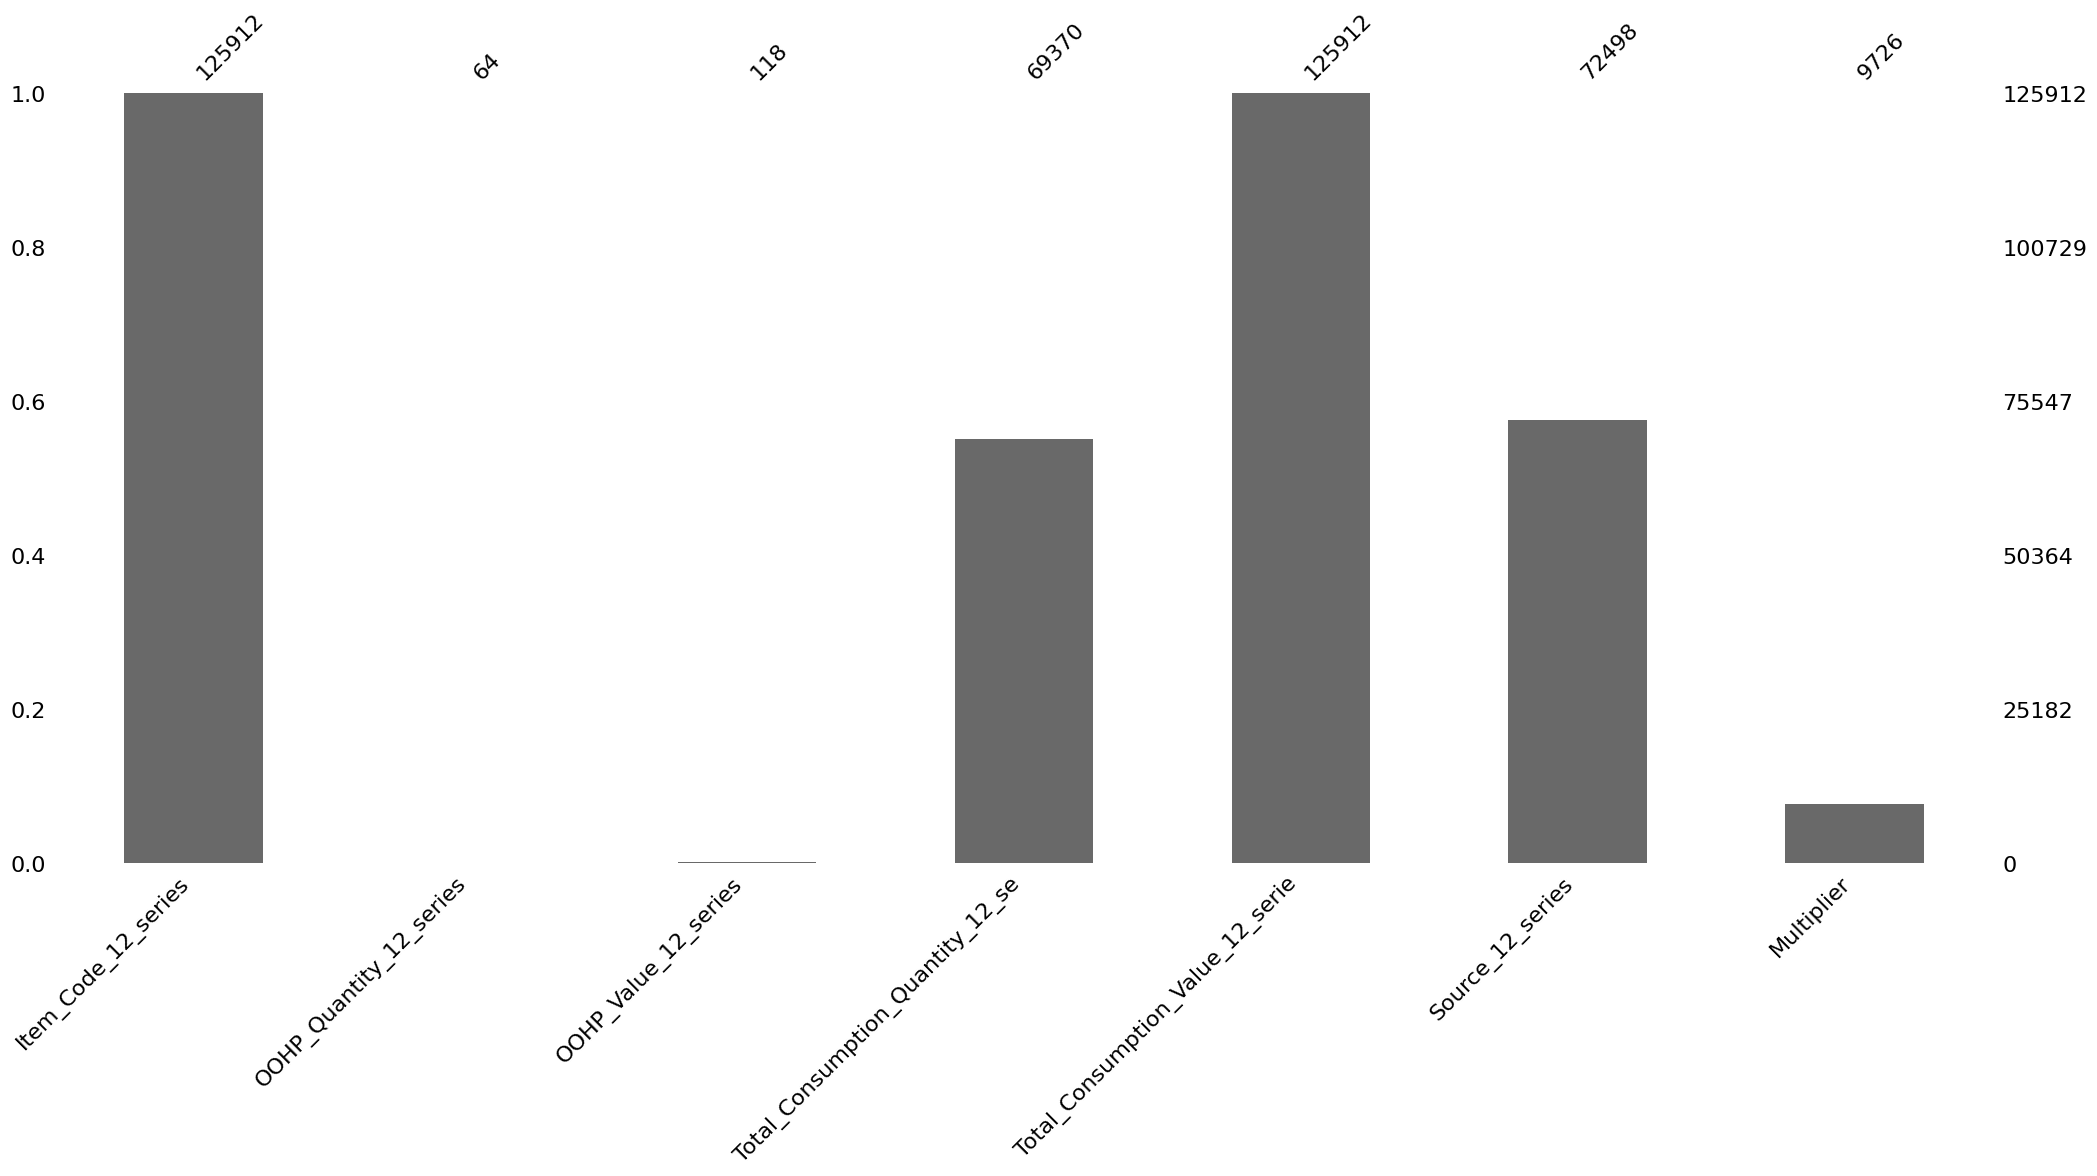

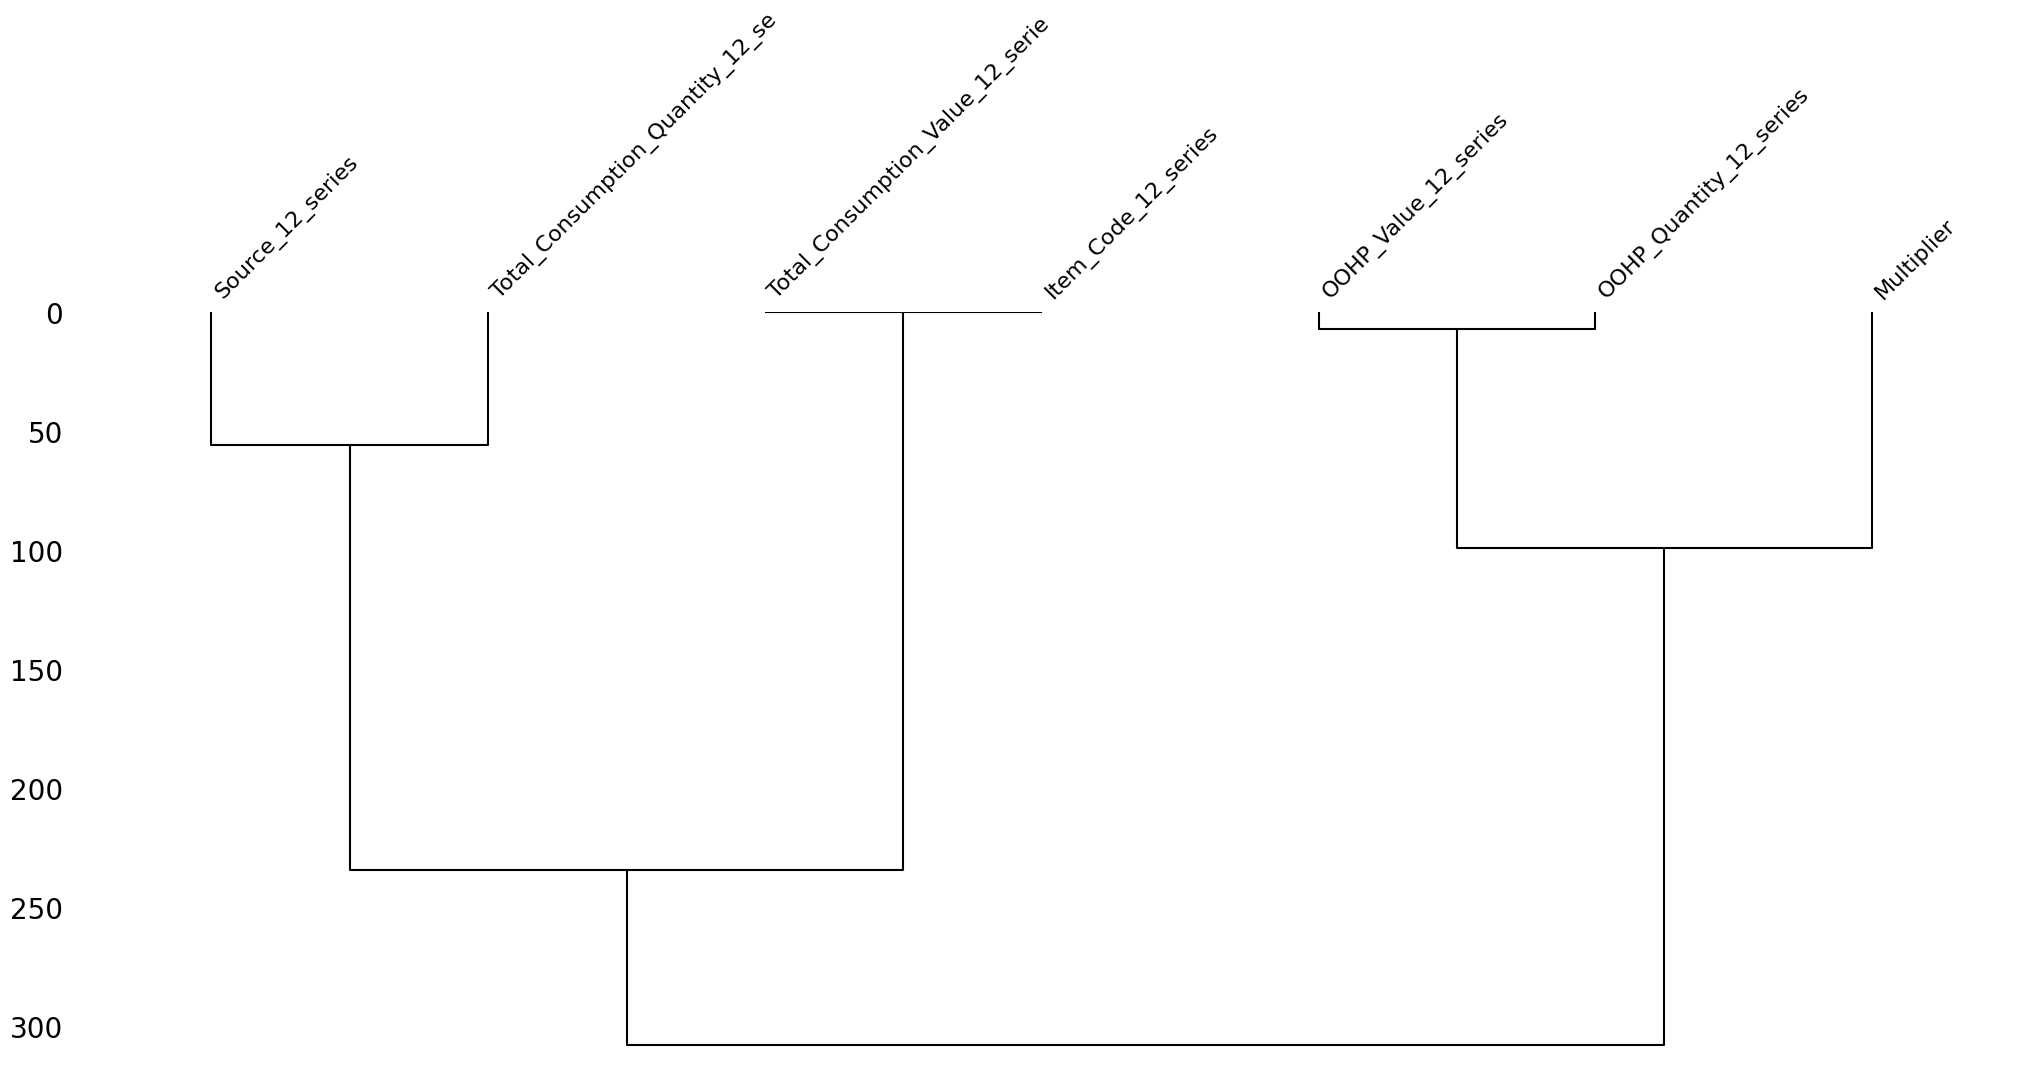

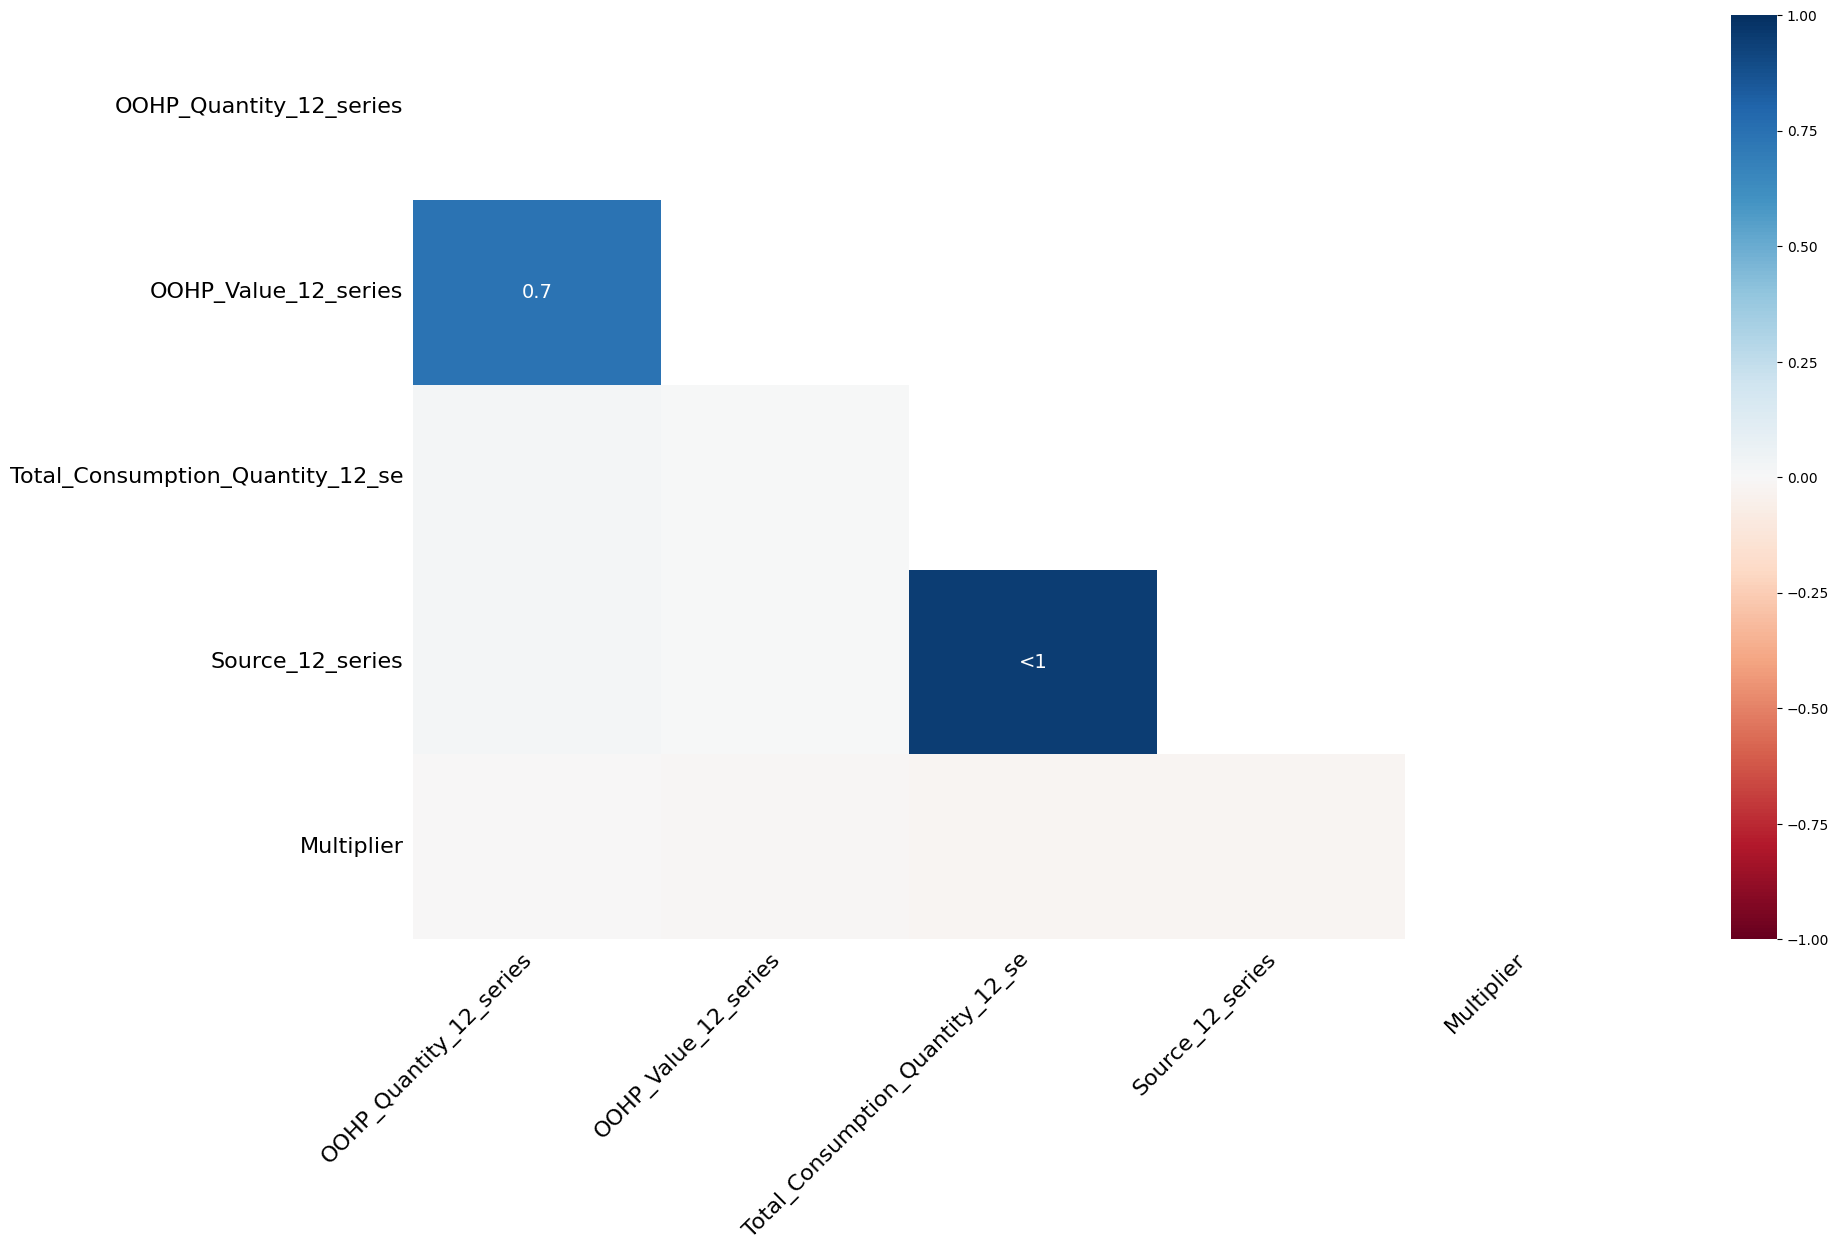

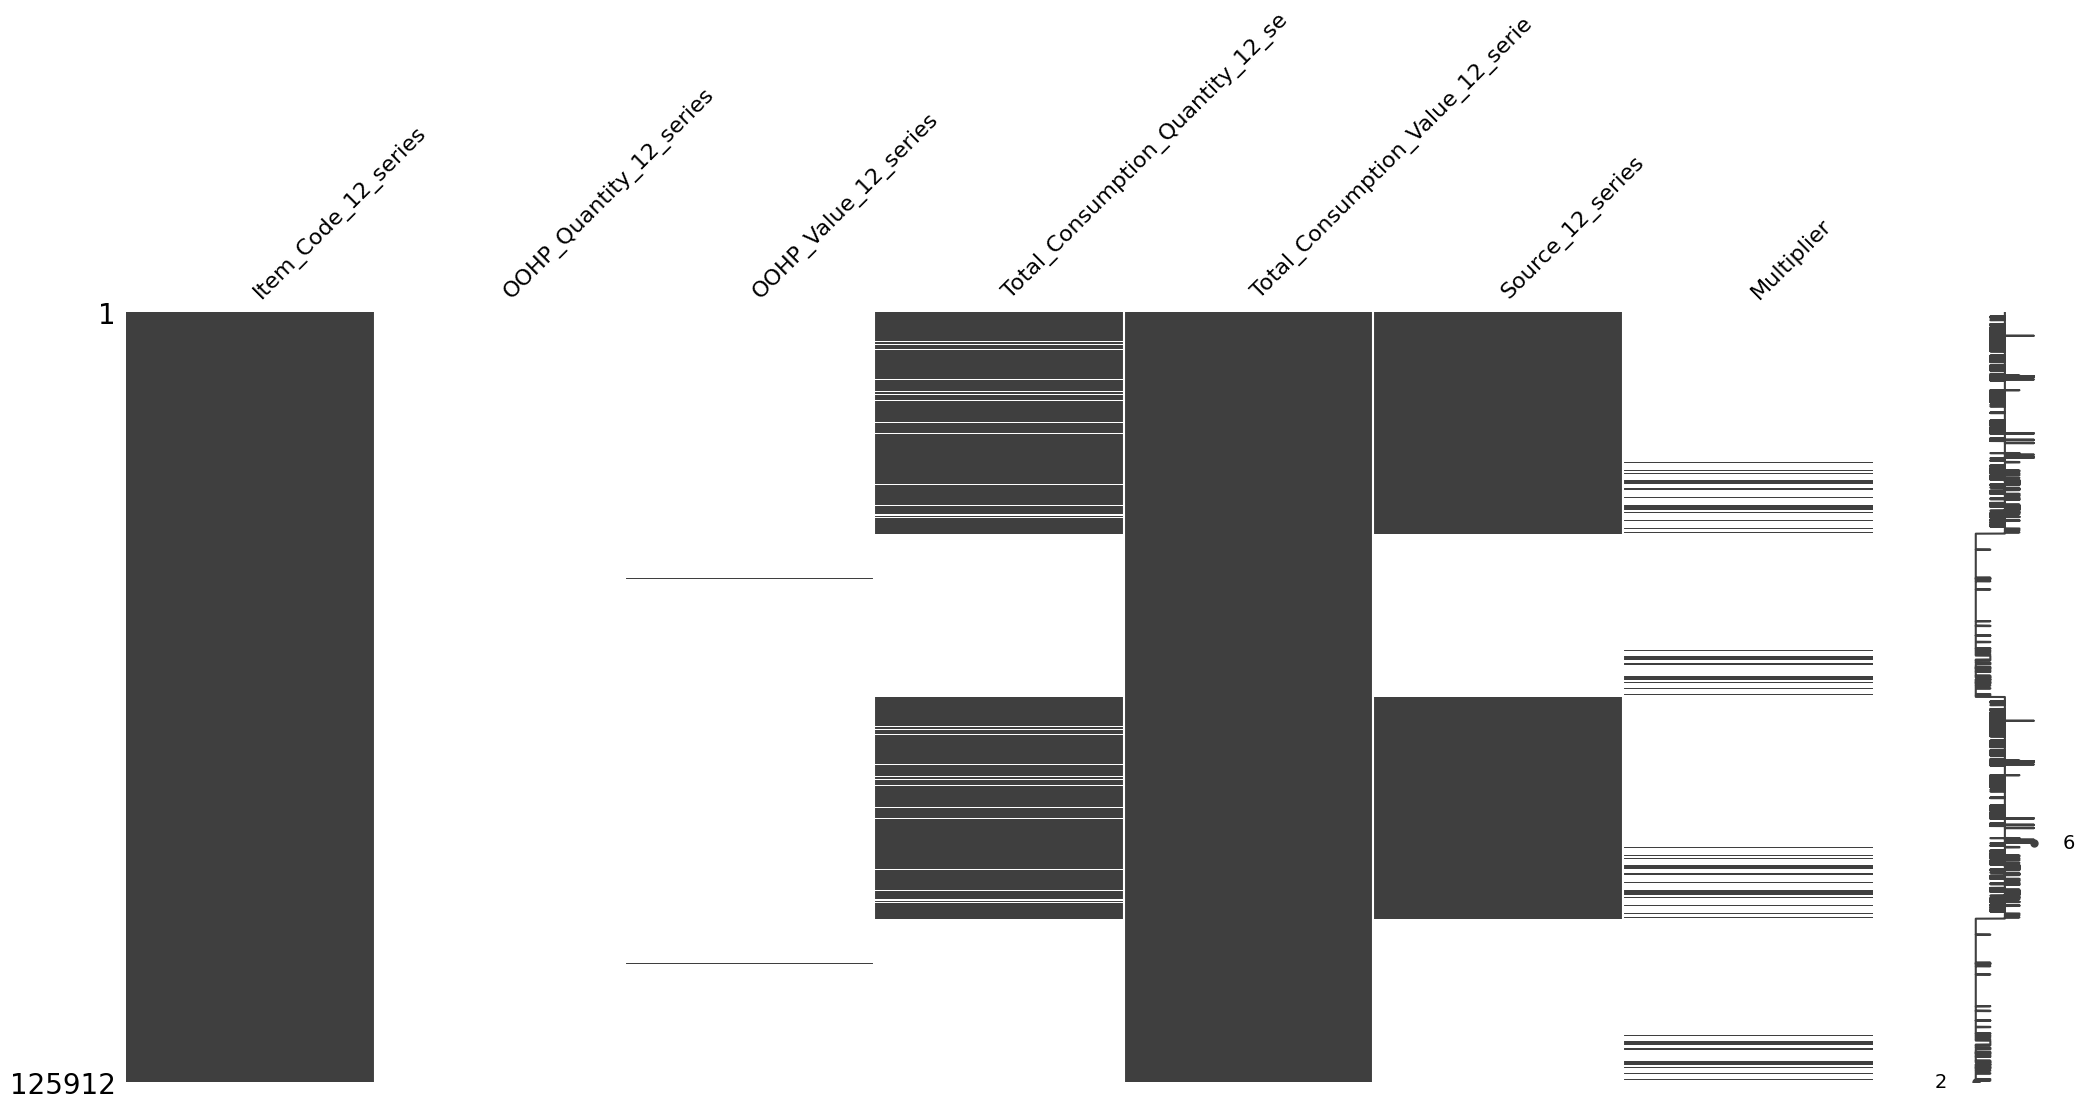

In [1]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-10\data\lev-10_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'Item_Code_12_series',
'OOHP_Quantity_12_series',
'OOHP_Value_12_series',
'Total_Consumption_Quantity_12_se',
'Total_Consumption_Value_12_serie',
'Source_12_series',
'Multiplier',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)